# Libraries

In [1]:
from Utils import *
from Models import *
from Train import *
# from Ensembler import *

import pandas as pd
from IPython.display import display
import os
import numpy as np
import time

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
import tensorflow.keras.backend as K

print('Libaries Loaded')

Utils Loaded
Models Loaded
Train Loaded
Libaries Loaded


In [2]:
## Sanity check for GPU
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [3]:
# Reading the file
src = r'C:\Users\Saad.LAKES\Desktop\Pavement-Temperature-Prediction\Data'
filename = 'Pave_data_cleaned.xlsx'

df = read_data(src,filename)

The shape of the dataframe is (10896, 7)
   Year  Month  Day  Hour  Temp  Solar  Pavement
0  2009     11    1     1   8.4    0.0  9.333333
1  2009     11    1     2   8.3    0.0  8.933333
2  2009     11    1     3   7.9    0.0  8.700000
3  2009     11    1     4   7.6    0.0  8.533333
4  2009     11    1     5   6.9    0.0  8.533333


In [4]:
# Splitting the data into training and testing

x_train,x_test,y_train,y_test,scaler = splitter(df[['Temp','Solar','Pavement']],['Pavement'],24,6,0.8,True)
print(f'The shape of x_train is {x_train.shape} and x_test is {x_test.shape}')
print(f'The shape of y_train is {y_train.shape} and y_test is {y_test.shape}')

(8716, 3) (2180, 3)
output ['Pavement']
The shape of x_train is (8686, 24, 3) and x_test is (2150, 24, 3)
The shape of y_train is (8686, 6) and y_test is (2150, 6)


You Selected LSTM
X_train shape is: (8686, 24, 3) and X_test shape is: (2150, 24, 3)
Y_train shape is: (8686, 6) and Y_test shape is: (2150, 6)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 24, 32)            4608      
_________________________________________________________________
lstm_1 (LSTM)                (None, 24, 32)            8320      
_________________________________________________________________
dropout (Dropout)            (None, 24, 32)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 24, 32)            8320      
_________________________________________________________________
lstm_3 (LSTM)                (None, 24, 32)            8320      
_________________________________________________________________
flatten (Flatten)            (None, 768)    

245/245 [==============================] - 2s 6ms/step - loss: 0.0012 - mae: 0.0254 - val_loss: 4.3965e-04 - val_mae: 0.0162
Epoch 44/200
245/245 [==============================] - 2s 6ms/step - loss: 0.0012 - mae: 0.0253 - val_loss: 5.8800e-04 - val_mae: 0.0193
Epoch 45/200
245/245 [==============================] - 2s 6ms/step - loss: 0.0012 - mae: 0.0250 - val_loss: 6.5172e-04 - val_mae: 0.0207
Epoch 46/200
245/245 [==============================] - 2s 6ms/step - loss: 0.0012 - mae: 0.0251 - val_loss: 4.4129e-04 - val_mae: 0.0161
Epoch 47/200
245/245 [==============================] - 2s 6ms/step - loss: 0.0012 - mae: 0.0251 - val_loss: 4.5346e-04 - val_mae: 0.0163
Epoch 48/200
245/245 [==============================] - 2s 6ms/step - loss: 0.0012 - mae: 0.0253 - val_loss: 5.1467e-04 - val_mae: 0.0173
Epoch 49/200
245/245 [==============================] - 2s 6ms/step - loss: 0.0012 - mae: 0.0253 - val_loss: 4.9873e-04 - val_mae: 0.0168
Epoch 50/200
245/245 [=========================

Epoch 102/200
245/245 [==============================] - 2s 7ms/step - loss: 9.4861e-04 - mae: 0.0222 - val_loss: 4.0041e-04 - val_mae: 0.0153
Epoch 103/200
245/245 [==============================] - 2s 6ms/step - loss: 9.2351e-04 - mae: 0.0220 - val_loss: 5.4329e-04 - val_mae: 0.0183
Epoch 104/200
245/245 [==============================] - 2s 6ms/step - loss: 9.4119e-04 - mae: 0.0223 - val_loss: 4.1806e-04 - val_mae: 0.0158
Epoch 105/200
245/245 [==============================] - 2s 7ms/step - loss: 9.2744e-04 - mae: 0.0222 - val_loss: 5.7304e-04 - val_mae: 0.0188
Epoch 106/200
245/245 [==============================] - 2s 6ms/step - loss: 8.8814e-04 - mae: 0.0217 - val_loss: 4.7963e-04 - val_mae: 0.0169
Epoch 107/200
245/245 [==============================] - 2s 7ms/step - loss: 9.1641e-04 - mae: 0.0220 - val_loss: 5.8107e-04 - val_mae: 0.0191
Epoch 108/200
245/245 [==============================] - 2s 6ms/step - loss: 8.8480e-04 - mae: 0.0215 - val_loss: 4.4999e-04 - val_mae: 0.0166

245/245 [==============================] - 2s 6ms/step - loss: 8.7165e-04 - mae: 0.0213 - val_loss: 6.1326e-04 - val_mae: 0.0189
Epoch 160/200
245/245 [==============================] - 2s 6ms/step - loss: 8.4947e-04 - mae: 0.0210 - val_loss: 5.5725e-04 - val_mae: 0.0183
Epoch 161/200
245/245 [==============================] - 2s 6ms/step - loss: 8.0134e-04 - mae: 0.0204 - val_loss: 3.8712e-04 - val_mae: 0.0150
Epoch 162/200
245/245 [==============================] - 2s 6ms/step - loss: 8.2968e-04 - mae: 0.0206 - val_loss: 4.2015e-04 - val_mae: 0.0155
Epoch 163/200
245/245 [==============================] - 2s 6ms/step - loss: 8.2703e-04 - mae: 0.0206 - val_loss: 5.4084e-04 - val_mae: 0.0175
Epoch 164/200
245/245 [==============================] - 2s 6ms/step - loss: 8.3154e-04 - mae: 0.0206 - val_loss: 4.4685e-04 - val_mae: 0.0162
Epoch 165/200
245/245 [==============================] - 2s 6ms/step - loss: 7.8527e-04 - mae: 0.0203 - val_loss: 5.5748e-04 - val_mae: 0.0185
Epoch 166/200

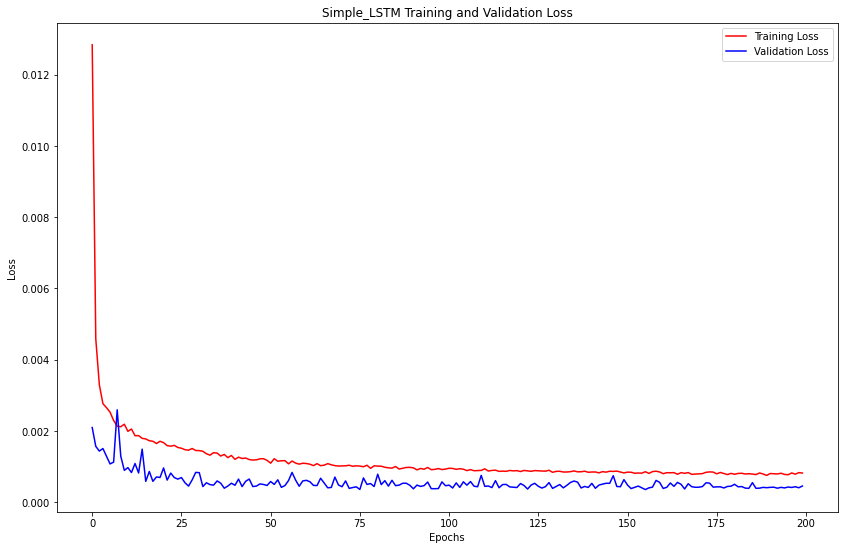

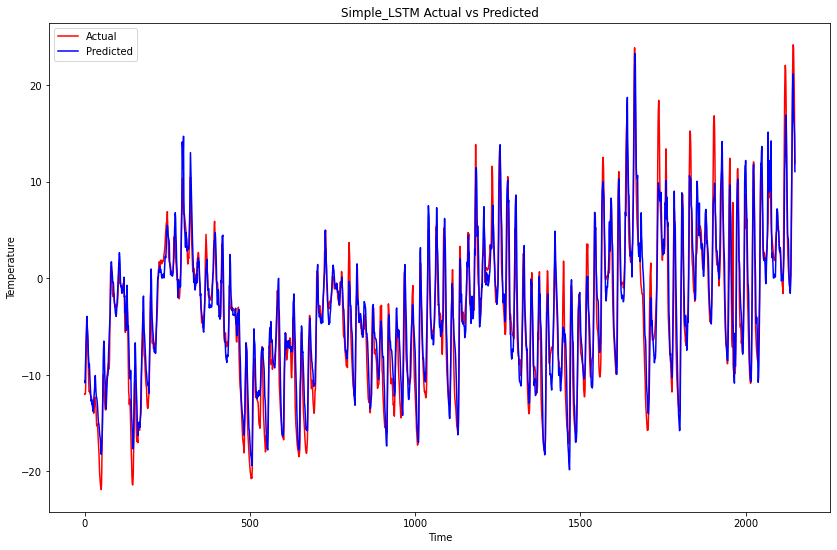

+-------------+----------+------+------+------+------+
| Hours Ahead | R2 Score | MAE  | MSE  | RMSE | AGM  |
+-------------+----------+------+------+------+------+
|      1      |   0.98   | 0.85 | 1.38 | 1.17 | 0.02 |
|      2      |   0.96   | 1.1  | 2.22 | 1.49 | 0.05 |
|      3      |   0.95   | 1.31 | 3.03 | 1.74 | 0.08 |
|      4      |   0.94   | 1.46 | 3.78 | 1.95 | 0.11 |
|      5      |   0.92   | 1.61 | 4.51 | 2.12 | 0.14 |
|      6      |   0.9    | 1.87 | 6.01 | 2.45 | 0.22 |
+-------------+----------+------+------+------+------+
--------------------------------------------------------------------------------
Moving onto Attention model
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 24, 32)            4608      
_________________________________________________________________
lstm_1 (LSTM)                (None, 24, 32)            83

Epoch 39/200
245/245 [==============================] - 2s 7ms/step - loss: 0.0015 - mae: 0.0281 - val_loss: 7.0279e-04 - val_mae: 0.0213
Epoch 40/200
245/245 [==============================] - 2s 7ms/step - loss: 0.0015 - mae: 0.0281 - val_loss: 7.3002e-04 - val_mae: 0.0219
Epoch 41/200
245/245 [==============================] - 2s 6ms/step - loss: 0.0016 - mae: 0.0283 - val_loss: 5.3938e-04 - val_mae: 0.0182
Epoch 42/200
245/245 [==============================] - 2s 7ms/step - loss: 0.0016 - mae: 0.0281 - val_loss: 5.2509e-04 - val_mae: 0.0174
Epoch 43/200
245/245 [==============================] - 2s 6ms/step - loss: 0.0015 - mae: 0.0275 - val_loss: 4.4872e-04 - val_mae: 0.0157
Epoch 44/200
245/245 [==============================] - 2s 6ms/step - loss: 0.0015 - mae: 0.0278 - val_loss: 5.4302e-04 - val_mae: 0.0175
Epoch 45/200
245/245 [==============================] - 2s 7ms/step - loss: 0.0015 - mae: 0.0280 - val_loss: 4.2424e-04 - val_mae: 0.0156
Epoch 46/200
245/245 [============

245/245 [==============================] - 2s 6ms/step - loss: 0.0011 - mae: 0.0238 - val_loss: 5.3836e-04 - val_mae: 0.0183
Epoch 99/200
245/245 [==============================] - 2s 6ms/step - loss: 0.0011 - mae: 0.0242 - val_loss: 4.1619e-04 - val_mae: 0.0156
Epoch 100/200
245/245 [==============================] - 2s 6ms/step - loss: 0.0011 - mae: 0.0239 - val_loss: 4.6401e-04 - val_mae: 0.0162
Epoch 101/200
245/245 [==============================] - 2s 6ms/step - loss: 0.0011 - mae: 0.0238 - val_loss: 4.6498e-04 - val_mae: 0.0168
Epoch 102/200
245/245 [==============================] - 2s 6ms/step - loss: 0.0011 - mae: 0.0237 - val_loss: 5.9124e-04 - val_mae: 0.0189
Epoch 103/200
245/245 [==============================] - 2s 6ms/step - loss: 0.0011 - mae: 0.0238 - val_loss: 3.9051e-04 - val_mae: 0.0149
Epoch 104/200
245/245 [==============================] - 2s 6ms/step - loss: 0.0011 - mae: 0.0244 - val_loss: 4.1803e-04 - val_mae: 0.0157
Epoch 105/200
245/245 [===================

245/245 [==============================] - 2s 6ms/step - loss: 9.3970e-04 - mae: 0.0220 - val_loss: 4.2599e-04 - val_mae: 0.0157
Epoch 157/200
245/245 [==============================] - 2s 6ms/step - loss: 9.0958e-04 - mae: 0.0218 - val_loss: 4.7628e-04 - val_mae: 0.0169
Epoch 158/200
245/245 [==============================] - 2s 6ms/step - loss: 9.3383e-04 - mae: 0.0219 - val_loss: 3.6175e-04 - val_mae: 0.0144
Epoch 159/200
245/245 [==============================] - 2s 6ms/step - loss: 9.6371e-04 - mae: 0.0223 - val_loss: 4.3992e-04 - val_mae: 0.0158
Epoch 160/200
245/245 [==============================] - 2s 6ms/step - loss: 9.5447e-04 - mae: 0.0222 - val_loss: 3.6603e-04 - val_mae: 0.0146
Epoch 161/200
245/245 [==============================] - 2s 6ms/step - loss: 9.1969e-04 - mae: 0.0217 - val_loss: 4.3727e-04 - val_mae: 0.0156
Epoch 162/200
245/245 [==============================] - 2s 6ms/step - loss: 9.0508e-04 - mae: 0.0218 - val_loss: 4.0474e-04 - val_mae: 0.0148
Epoch 163/200

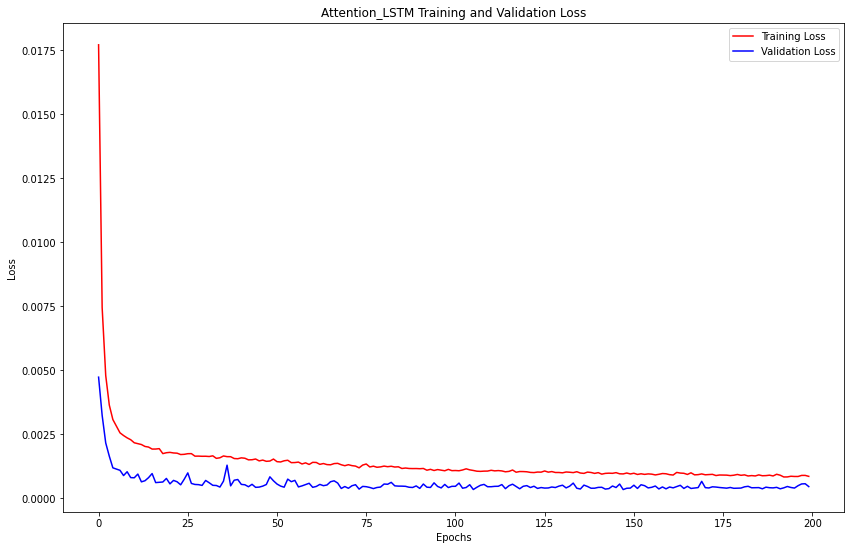

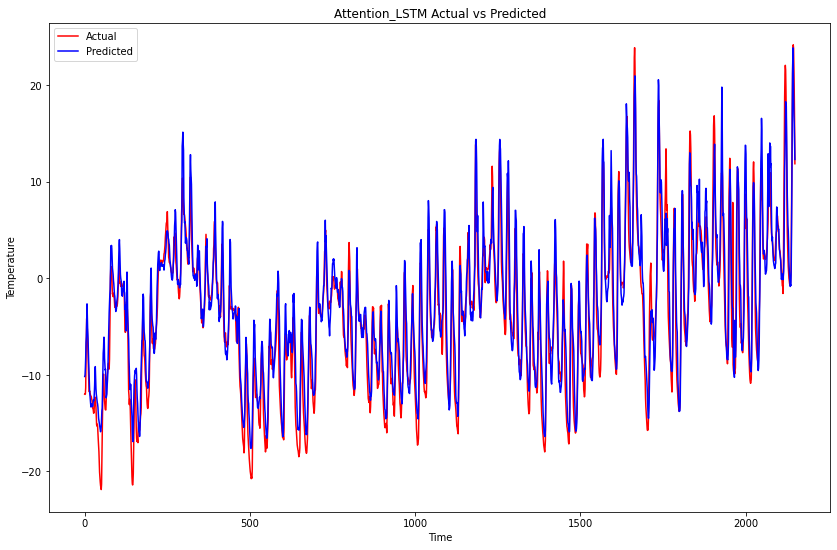

+-------------+----------+------+------+------+------+
| Hours Ahead | R2 Score | MAE  | MSE  | RMSE | AGM  |
+-------------+----------+------+------+------+------+
|      1      |   0.98   | 0.84 | 1.33 | 1.15 | 0.02 |
|      2      |   0.96   | 1.09 | 2.18 | 1.48 | 0.05 |
|      3      |   0.96   | 1.2  | 2.55 | 1.6  | 0.06 |
|      4      |   0.94   | 1.41 | 3.39 | 1.84 | 0.09 |
|      5      |   0.92   | 1.65 | 4.54 | 2.13 | 0.15 |
|      6      |   0.89   | 1.96 | 6.32 | 2.51 | 0.24 |
+-------------+----------+------+------+------+------+


,Attention,MAE,MSE,RMSE,R2,Agg,Time Taken,Hours Ahead
0,False,0.846480,1.377619,1.173720,0.976078,0.024164,5.32,1
1,False,1.101935,2.215189,1.488351,0.961756,0.049532,5.32,2
2,False,1.306094,3.031564,1.741139,0.947918,0.079353,5.32,3
3,False,1.462820,3.783588,1.945145,0.935252,0.110329,5.32,4
4,False,1.611642,4.506037,2.122743,0.923100,0.143587,5.32,5
5,False,1.870696,6.010146,2.451560,0.897579,0.221346,5.32,6
0,True,0.840012,1.331480,1.153898,0.976879,0.023051,5.40,1
1,True,1.091378,2.175705,1.475027,0.962437,0.048201,5.40,2
2,True,1.202472,2.553189,1.597870,0.956136,0.061417,5.40,3
3,True,1.408908,3.394302,1.842363,0.941914,0.094427,5.40,4


Files deleted


In [6]:
build_model('LSTM',scaler,x_train,x_test,y_train,y_test,32,200)

You selected ConvLSTM
X_train shape is: (8686, 1, 1, 24, 3) and X_test shape is: (2150, 1, 1, 24, 3)
Y_train shape is: (8686, 6) and Y_test shape is: (2150, 6)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d (ConvLSTM2D)    (None, 1, 1, 22, 64)      51712     
_________________________________________________________________
conv_lst_m2d_1 (ConvLSTM2D)  (None, 1, 1, 20, 64)      98560     
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  (None, 1, 1, 18, 64)      98560     
_________________________________________________________________
conv_lst_m2d_3 (ConvLSTM2D)  (None, 1, 1, 16, 64)      98560     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)               

245/245 [==============================] - 6s 25ms/step - loss: 9.7418e-04 - mae: 0.0215 - val_loss: 5.3139e-04 - val_mae: 0.0178
Epoch 46/200
245/245 [==============================] - 6s 25ms/step - loss: 9.5850e-04 - mae: 0.0213 - val_loss: 4.6550e-04 - val_mae: 0.0164
Epoch 47/200
245/245 [==============================] - 6s 25ms/step - loss: 9.3962e-04 - mae: 0.0210 - val_loss: 7.8025e-04 - val_mae: 0.0228
Epoch 48/200
245/245 [==============================] - 6s 24ms/step - loss: 9.3657e-04 - mae: 0.0210 - val_loss: 5.0127e-04 - val_mae: 0.0172
Epoch 49/200
245/245 [==============================] - 6s 25ms/step - loss: 9.4200e-04 - mae: 0.0211 - val_loss: 6.2674e-04 - val_mae: 0.0200
Epoch 50/200
245/245 [==============================] - 6s 26ms/step - loss: 9.0392e-04 - mae: 0.0205 - val_loss: 5.0191e-04 - val_mae: 0.0172
Epoch 51/200
245/245 [==============================] - 6s 25ms/step - loss: 9.2079e-04 - mae: 0.0207 - val_loss: 5.8720e-04 - val_mae: 0.0193
Epoch 52/200

245/245 [==============================] - 6s 25ms/step - loss: 6.9912e-04 - mae: 0.0181 - val_loss: 3.9173e-04 - val_mae: 0.0147
Epoch 103/200
245/245 [==============================] - 6s 25ms/step - loss: 7.0435e-04 - mae: 0.0183 - val_loss: 3.8695e-04 - val_mae: 0.0147
Epoch 104/200
245/245 [==============================] - 6s 24ms/step - loss: 6.8823e-04 - mae: 0.0179 - val_loss: 3.9145e-04 - val_mae: 0.0150
Epoch 105/200
245/245 [==============================] - 6s 25ms/step - loss: 7.0234e-04 - mae: 0.0183 - val_loss: 3.9760e-04 - val_mae: 0.0150
Epoch 106/200
245/245 [==============================] - 6s 25ms/step - loss: 6.9462e-04 - mae: 0.0181 - val_loss: 4.7164e-04 - val_mae: 0.0167
Epoch 107/200
245/245 [==============================] - 6s 25ms/step - loss: 6.8273e-04 - mae: 0.0179 - val_loss: 3.9091e-04 - val_mae: 0.0148
Epoch 108/200
245/245 [==============================] - 6s 25ms/step - loss: 6.8358e-04 - mae: 0.0180 - val_loss: 4.2930e-04 - val_mae: 0.0156
Epoch 

Epoch 159/200
245/245 [==============================] - 6s 25ms/step - loss: 5.5075e-04 - mae: 0.0163 - val_loss: 3.8617e-04 - val_mae: 0.0147
Epoch 160/200
245/245 [==============================] - 6s 26ms/step - loss: 5.4822e-04 - mae: 0.0162 - val_loss: 4.1538e-04 - val_mae: 0.0155
Epoch 161/200
245/245 [==============================] - 6s 25ms/step - loss: 5.4240e-04 - mae: 0.0161 - val_loss: 3.6496e-04 - val_mae: 0.0143
Epoch 162/200
245/245 [==============================] - 6s 25ms/step - loss: 5.5689e-04 - mae: 0.0164 - val_loss: 3.8195e-04 - val_mae: 0.0146
Epoch 163/200
245/245 [==============================] - 6s 24ms/step - loss: 5.3693e-04 - mae: 0.0161 - val_loss: 4.0421e-04 - val_mae: 0.0152
Epoch 164/200
245/245 [==============================] - 6s 25ms/step - loss: 5.3460e-04 - mae: 0.0161 - val_loss: 3.8329e-04 - val_mae: 0.0148
Epoch 165/200
245/245 [==============================] - 6s 25ms/step - loss: 5.3625e-04 - mae: 0.0162 - val_loss: 3.7259e-04 - val_mae:

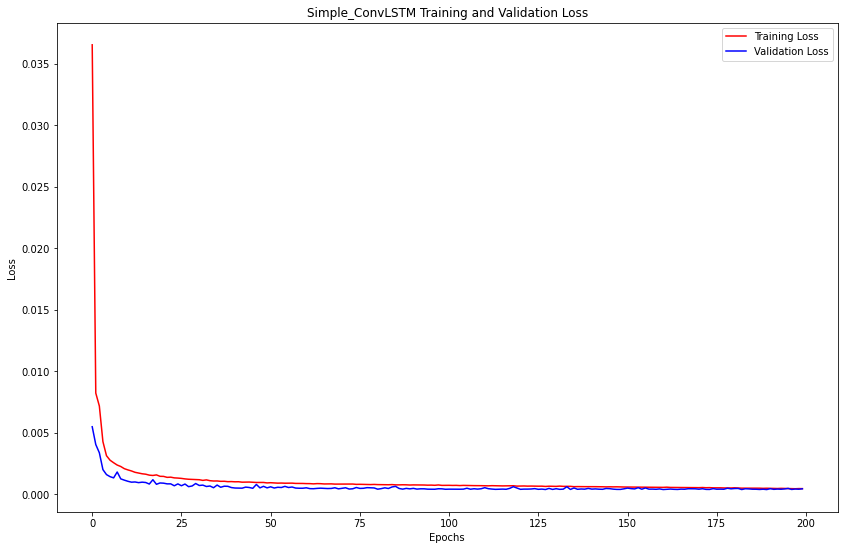

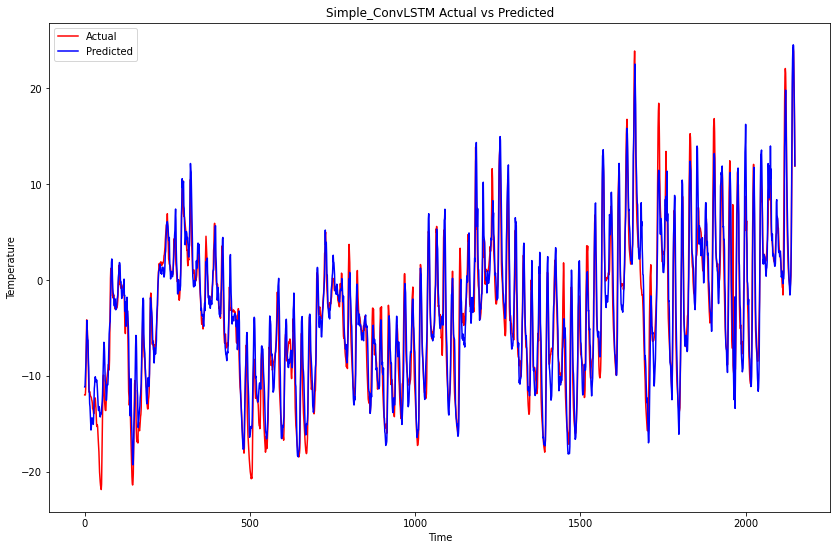

+-------------+----------+------+------+------+------+
| Hours Ahead | R2 Score | MAE  | MSE  | RMSE | AGM  |
+-------------+----------+------+------+------+------+
|      1      |   0.97   | 0.91 | 1.59 | 1.26 | 0.03 |
|      2      |   0.96   | 1.04 | 2.04 | 1.43 | 0.04 |
|      3      |   0.96   | 1.15 | 2.45 | 1.57 | 0.06 |
|      4      |   0.94   | 1.37 | 3.28 | 1.81 | 0.09 |
|      5      |   0.92   | 1.61 | 4.59 | 2.14 | 0.15 |
|      6      |   0.9    | 1.84 | 6.15 | 2.48 | 0.23 |
+-------------+----------+------+------+------+------+
------------------------------
Moving onto Attention model
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d (ConvLSTM2D)    (None, 1, 1, 22, 64)      51712     
_________________________________________________________________
conv_lst_m2d_1 (ConvLSTM2D)  (None, 1, 1, 20, 64)      98560     
_________________________________________

Epoch 41/200
245/245 [==============================] - 6s 26ms/step - loss: 9.5410e-04 - mae: 0.0212 - val_loss: 6.5536e-04 - val_mae: 0.0206
Epoch 42/200
245/245 [==============================] - 6s 26ms/step - loss: 9.2032e-04 - mae: 0.0207 - val_loss: 5.5426e-04 - val_mae: 0.0184
Epoch 43/200
245/245 [==============================] - 6s 26ms/step - loss: 9.2689e-04 - mae: 0.0208 - val_loss: 4.4795e-04 - val_mae: 0.0161
Epoch 44/200
245/245 [==============================] - 6s 26ms/step - loss: 9.2371e-04 - mae: 0.0208 - val_loss: 5.9031e-04 - val_mae: 0.0194
Epoch 45/200
245/245 [==============================] - 6s 26ms/step - loss: 9.0574e-04 - mae: 0.0206 - val_loss: 4.9708e-04 - val_mae: 0.0173
Epoch 46/200
245/245 [==============================] - 6s 26ms/step - loss: 9.0530e-04 - mae: 0.0206 - val_loss: 6.4617e-04 - val_mae: 0.0205
Epoch 47/200
245/245 [==============================] - 6s 26ms/step - loss: 8.9845e-04 - mae: 0.0206 - val_loss: 4.8792e-04 - val_mae: 0.0172

245/245 [==============================] - 6s 26ms/step - loss: 6.8403e-04 - mae: 0.0180 - val_loss: 4.3670e-04 - val_mae: 0.0159
Epoch 99/200
245/245 [==============================] - 6s 26ms/step - loss: 6.9367e-04 - mae: 0.0181 - val_loss: 4.1450e-04 - val_mae: 0.0152
Epoch 100/200
245/245 [==============================] - 6s 26ms/step - loss: 6.8058e-04 - mae: 0.0179 - val_loss: 4.7674e-04 - val_mae: 0.0169
Epoch 101/200
245/245 [==============================] - 6s 26ms/step - loss: 6.7652e-04 - mae: 0.0178 - val_loss: 3.9973e-04 - val_mae: 0.0149
Epoch 102/200
245/245 [==============================] - 6s 26ms/step - loss: 6.8190e-04 - mae: 0.0180 - val_loss: 5.2587e-04 - val_mae: 0.0179
Epoch 103/200
245/245 [==============================] - 6s 26ms/step - loss: 6.8335e-04 - mae: 0.0180 - val_loss: 4.0303e-04 - val_mae: 0.0152
Epoch 104/200
245/245 [==============================] - 6s 26ms/step - loss: 6.7248e-04 - mae: 0.0179 - val_loss: 5.5564e-04 - val_mae: 0.0183
Epoch 1

Epoch 155/200
245/245 [==============================] - 6s 26ms/step - loss: 5.5426e-04 - mae: 0.0164 - val_loss: 5.1609e-04 - val_mae: 0.0176
Epoch 156/200
245/245 [==============================] - 6s 26ms/step - loss: 5.4857e-04 - mae: 0.0164 - val_loss: 5.1442e-04 - val_mae: 0.0177
Epoch 157/200
245/245 [==============================] - 6s 26ms/step - loss: 5.5069e-04 - mae: 0.0163 - val_loss: 3.7882e-04 - val_mae: 0.0146
Epoch 158/200
245/245 [==============================] - 6s 26ms/step - loss: 5.3032e-04 - mae: 0.0160 - val_loss: 4.0390e-04 - val_mae: 0.0151
Epoch 159/200
245/245 [==============================] - 6s 26ms/step - loss: 5.2276e-04 - mae: 0.0159 - val_loss: 3.5690e-04 - val_mae: 0.0141
Epoch 160/200
245/245 [==============================] - 6s 26ms/step - loss: 5.3422e-04 - mae: 0.0161 - val_loss: 3.9924e-04 - val_mae: 0.0149
Epoch 161/200
245/245 [==============================] - 6s 26ms/step - loss: 5.3019e-04 - mae: 0.0161 - val_loss: 4.2897e-04 - val_mae:

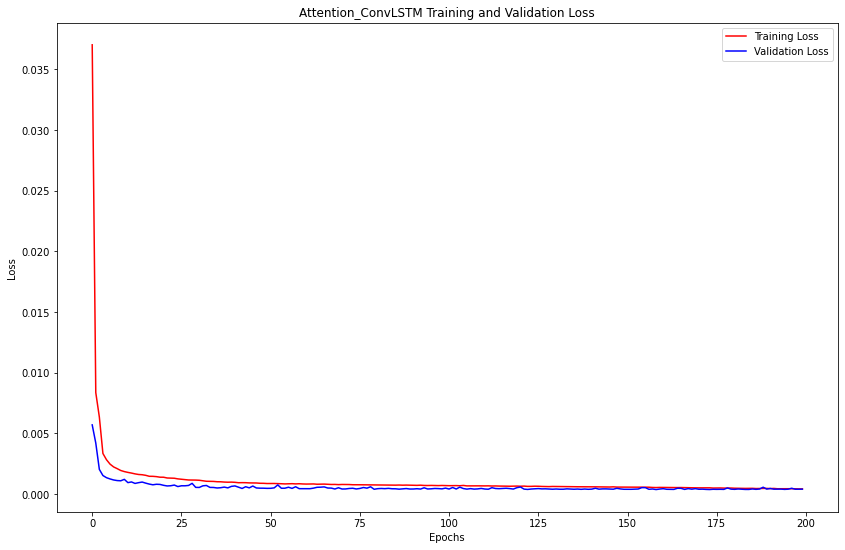

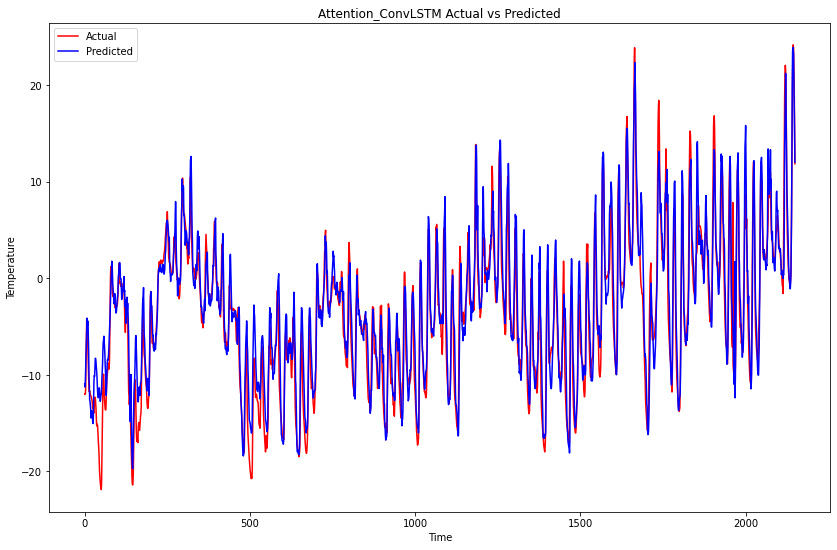

+-------------+----------+------+------+------+------+
| Hours Ahead | R2 Score | MAE  | MSE  | RMSE | AGM  |
+-------------+----------+------+------+------+------+
|      1      |   0.97   | 0.96 | 1.71 | 1.31 | 0.03 |
|      2      |   0.96   | 1.07 | 2.07 | 1.44 | 0.04 |
|      3      |   0.96   | 1.16 | 2.45 | 1.56 | 0.06 |
|      4      |   0.94   | 1.36 | 3.34 | 1.83 | 0.09 |
|      5      |   0.92   | 1.62 | 4.8  | 2.19 | 0.16 |
|      6      |   0.89   | 1.92 | 6.69 | 2.59 | 0.26 |
+-------------+----------+------+------+------+------+


,Attention,MAE,MSE,RMSE,R2,Agg,Time Taken,Hours Ahead
0,False,0.914577,1.593833,1.262471,0.972323,0.030127,20.67,1
1,False,1.043882,2.043533,1.429522,0.964719,0.043632,20.67,2
2,False,1.148186,2.449593,1.565118,0.957916,0.057093,20.67,3
3,False,1.366167,3.284756,1.812390,0.943789,0.089336,20.67,4
4,False,1.612952,4.587092,2.141750,0.921717,0.146966,20.67,5
5,False,1.843292,6.151488,2.480219,0.895170,0.226617,20.67,6
0,True,0.962650,1.706546,1.306348,0.970366,0.033620,21.22,1
1,True,1.065523,2.074743,1.440397,0.964180,0.044881,21.22,2
2,True,1.155270,2.448857,1.564882,0.957929,0.057220,21.22,3
3,True,1.357691,3.338668,1.827202,0.942866,0.090983,21.22,4


Files deleted


In [5]:
build_model('ConvLSTM',scaler,x_train,x_test,y_train,y_test,32,200)

You selected CNN-LSTM
X_train shape is: (8686, 24, 3) and X_test shape is: (2150, 24, 3)
Y_train shape is: (8686, 6) and Y_test shape is: (2150, 6)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 22, 64)            640       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 20, 64)            12352     
_________________________________________________________________
lstm (LSTM)                  (None, 20, 64)            33024     
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 64)            33024     
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 512)

245/245 [==============================] - 1s 4ms/step - loss: 6.4598e-04 - mae: 0.0177 - val_loss: 4.6137e-04 - val_mae: 0.0166
Epoch 45/200
245/245 [==============================] - 1s 4ms/step - loss: 6.4093e-04 - mae: 0.0177 - val_loss: 4.5769e-04 - val_mae: 0.0169
Epoch 46/200
245/245 [==============================] - 1s 4ms/step - loss: 6.2355e-04 - mae: 0.0175 - val_loss: 4.9618e-04 - val_mae: 0.0170
Epoch 47/200
245/245 [==============================] - 1s 4ms/step - loss: 6.1709e-04 - mae: 0.0173 - val_loss: 4.5029e-04 - val_mae: 0.0166
Epoch 48/200
245/245 [==============================] - 1s 4ms/step - loss: 6.4344e-04 - mae: 0.0178 - val_loss: 4.8717e-04 - val_mae: 0.0169
Epoch 49/200
245/245 [==============================] - 1s 4ms/step - loss: 5.9202e-04 - mae: 0.0169 - val_loss: 5.0473e-04 - val_mae: 0.0173
Epoch 50/200
245/245 [==============================] - 1s 4ms/step - loss: 6.2114e-04 - mae: 0.0174 - val_loss: 4.3790e-04 - val_mae: 0.0161
Epoch 51/200
245/24

Epoch 102/200
245/245 [==============================] - 1s 4ms/step - loss: 3.2815e-04 - mae: 0.0132 - val_loss: 5.7130e-04 - val_mae: 0.0186
Epoch 103/200
245/245 [==============================] - 1s 4ms/step - loss: 2.8828e-04 - mae: 0.0123 - val_loss: 4.7949e-04 - val_mae: 0.0165
Epoch 104/200
245/245 [==============================] - 1s 4ms/step - loss: 3.1045e-04 - mae: 0.0129 - val_loss: 5.6776e-04 - val_mae: 0.0186
Epoch 105/200
245/245 [==============================] - 1s 4ms/step - loss: 2.8095e-04 - mae: 0.0122 - val_loss: 4.8716e-04 - val_mae: 0.0165
Epoch 106/200
245/245 [==============================] - 1s 4ms/step - loss: 2.8288e-04 - mae: 0.0123 - val_loss: 5.0391e-04 - val_mae: 0.0172
Epoch 107/200
245/245 [==============================] - 1s 4ms/step - loss: 2.7904e-04 - mae: 0.0122 - val_loss: 4.6914e-04 - val_mae: 0.0164
Epoch 108/200
245/245 [==============================] - 1s 4ms/step - loss: 2.7999e-04 - mae: 0.0122 - val_loss: 5.0930e-04 - val_mae: 0.0169

245/245 [==============================] - 1s 4ms/step - loss: 1.7498e-04 - mae: 0.0098 - val_loss: 6.6155e-04 - val_mae: 0.0201
Epoch 160/200
245/245 [==============================] - 1s 4ms/step - loss: 1.5445e-04 - mae: 0.0092 - val_loss: 7.0046e-04 - val_mae: 0.0203
Epoch 161/200
245/245 [==============================] - 1s 4ms/step - loss: 1.7018e-04 - mae: 0.0097 - val_loss: 6.9011e-04 - val_mae: 0.0201
Epoch 162/200
245/245 [==============================] - 1s 4ms/step - loss: 1.5505e-04 - mae: 0.0092 - val_loss: 5.9433e-04 - val_mae: 0.0183
Epoch 163/200
245/245 [==============================] - 1s 4ms/step - loss: 1.6886e-04 - mae: 0.0096 - val_loss: 6.8948e-04 - val_mae: 0.0203
Epoch 164/200
245/245 [==============================] - 1s 4ms/step - loss: 1.7366e-04 - mae: 0.0098 - val_loss: 5.7732e-04 - val_mae: 0.0181
Epoch 165/200
245/245 [==============================] - 1s 4ms/step - loss: 1.5788e-04 - mae: 0.0093 - val_loss: 6.6492e-04 - val_mae: 0.0198
Epoch 166/200

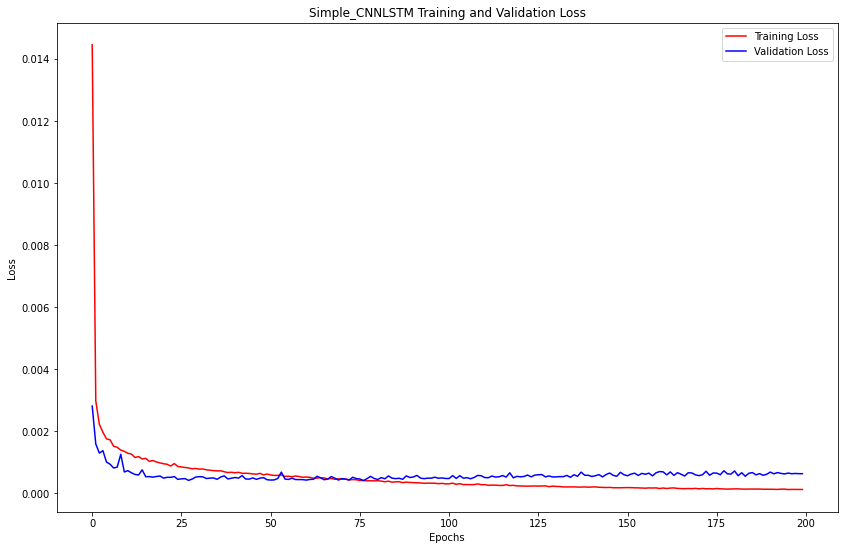

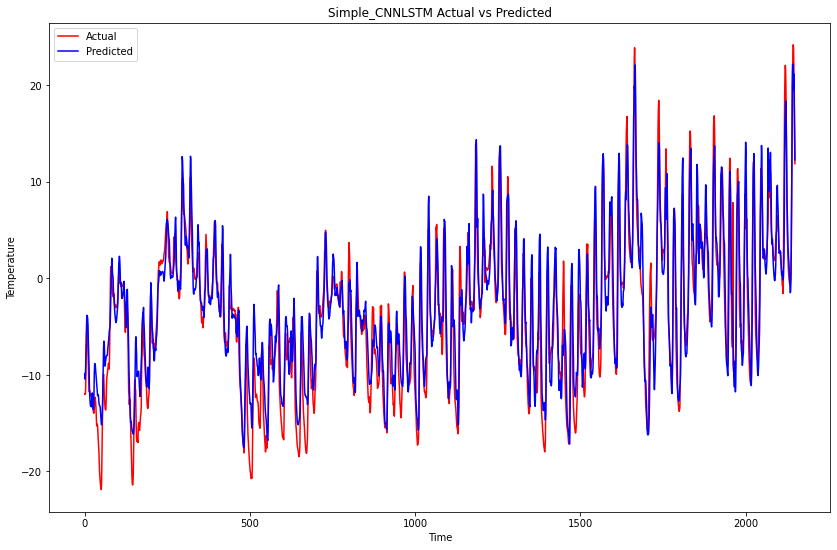

+-------------+----------+------+------+------+------+
| Hours Ahead | R2 Score | MAE  | MSE  | RMSE | AGM  |
+-------------+----------+------+------+------+------+
|      1      |   0.96   | 1.15 | 2.43 | 1.56 | 0.06 |
|      2      |   0.95   | 1.32 | 3.18 | 1.78 | 0.09 |
|      3      |   0.94   | 1.47 | 3.76 | 1.94 | 0.11 |
|      4      |   0.93   | 1.59 | 4.37 | 2.09 | 0.14 |
|      5      |   0.91   | 1.81 | 5.45 | 2.33 | 0.19 |
|      6      |   0.87   | 2.15 | 7.68 | 2.77 | 0.32 |
+-------------+----------+------+------+------+------+
------------------------------
Moving onto Attention model
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 22, 64)            640       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 20, 64)            12352     
_________________________________________

245/245 [==============================] - 1s 5ms/step - loss: 8.2644e-04 - mae: 0.0200 - val_loss: 4.7781e-04 - val_mae: 0.0172
Epoch 41/200
245/245 [==============================] - 1s 4ms/step - loss: 8.0104e-04 - mae: 0.0197 - val_loss: 4.7903e-04 - val_mae: 0.0172
Epoch 42/200
245/245 [==============================] - 1s 5ms/step - loss: 7.9725e-04 - mae: 0.0196 - val_loss: 4.5738e-04 - val_mae: 0.0163
Epoch 43/200
245/245 [==============================] - 1s 5ms/step - loss: 8.0067e-04 - mae: 0.0196 - val_loss: 4.7927e-04 - val_mae: 0.0175
Epoch 44/200
245/245 [==============================] - 1s 4ms/step - loss: 7.8270e-04 - mae: 0.0194 - val_loss: 4.8543e-04 - val_mae: 0.0174
Epoch 45/200
245/245 [==============================] - 1s 4ms/step - loss: 7.6707e-04 - mae: 0.0192 - val_loss: 6.9480e-04 - val_mae: 0.0219
Epoch 46/200
245/245 [==============================] - 1s 5ms/step - loss: 7.8979e-04 - mae: 0.0195 - val_loss: 5.8158e-04 - val_mae: 0.0196
Epoch 47/200
245/24

Epoch 98/200
245/245 [==============================] - 1s 5ms/step - loss: 5.0344e-04 - mae: 0.0159 - val_loss: 3.8353e-04 - val_mae: 0.0151
Epoch 99/200
245/245 [==============================] - 1s 5ms/step - loss: 5.0097e-04 - mae: 0.0157 - val_loss: 3.8122e-04 - val_mae: 0.0148
Epoch 100/200
245/245 [==============================] - 1s 4ms/step - loss: 5.1436e-04 - mae: 0.0161 - val_loss: 4.8523e-04 - val_mae: 0.0176
Epoch 101/200
245/245 [==============================] - 1s 5ms/step - loss: 5.0466e-04 - mae: 0.0158 - val_loss: 3.6522e-04 - val_mae: 0.0145
Epoch 102/200
245/245 [==============================] - 1s 5ms/step - loss: 5.0262e-04 - mae: 0.0157 - val_loss: 3.7381e-04 - val_mae: 0.0146
Epoch 103/200
245/245 [==============================] - 1s 5ms/step - loss: 4.9277e-04 - mae: 0.0157 - val_loss: 4.0080e-04 - val_mae: 0.0154
Epoch 104/200
245/245 [==============================] - 1s 4ms/step - loss: 4.7983e-04 - mae: 0.0155 - val_loss: 4.3037e-04 - val_mae: 0.0161
E

245/245 [==============================] - 1s 5ms/step - loss: 3.1860e-04 - mae: 0.0130 - val_loss: 4.2452e-04 - val_mae: 0.0155
Epoch 156/200
245/245 [==============================] - 1s 5ms/step - loss: 2.9877e-04 - mae: 0.0126 - val_loss: 4.0813e-04 - val_mae: 0.0150
Epoch 157/200
245/245 [==============================] - 1s 5ms/step - loss: 3.0077e-04 - mae: 0.0127 - val_loss: 4.8565e-04 - val_mae: 0.0171
Epoch 158/200
245/245 [==============================] - 1s 5ms/step - loss: 3.0661e-04 - mae: 0.0128 - val_loss: 4.1308e-04 - val_mae: 0.0151
Epoch 159/200
245/245 [==============================] - 1s 4ms/step - loss: 3.0057e-04 - mae: 0.0126 - val_loss: 3.8680e-04 - val_mae: 0.0146
Epoch 160/200
245/245 [==============================] - 1s 5ms/step - loss: 3.0054e-04 - mae: 0.0126 - val_loss: 5.2038e-04 - val_mae: 0.0177
Epoch 161/200
245/245 [==============================] - 1s 4ms/step - loss: 2.8460e-04 - mae: 0.0123 - val_loss: 5.3226e-04 - val_mae: 0.0179
Epoch 162/200

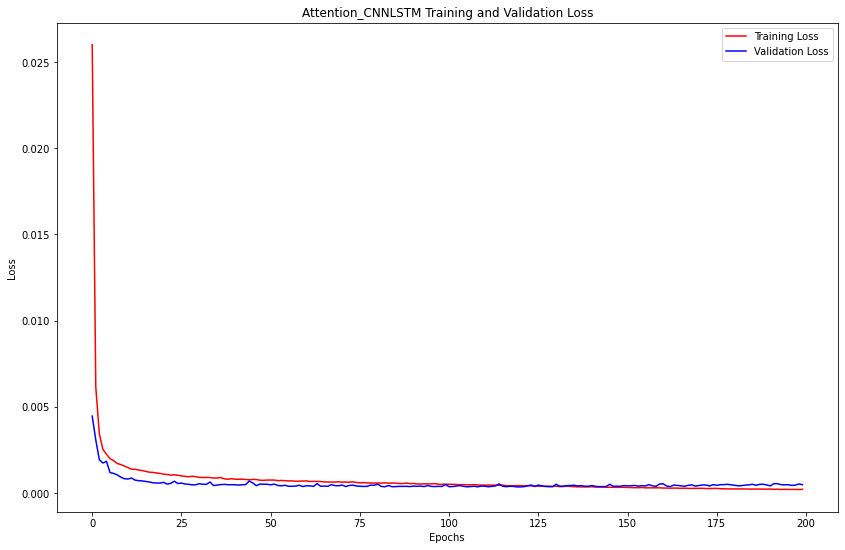

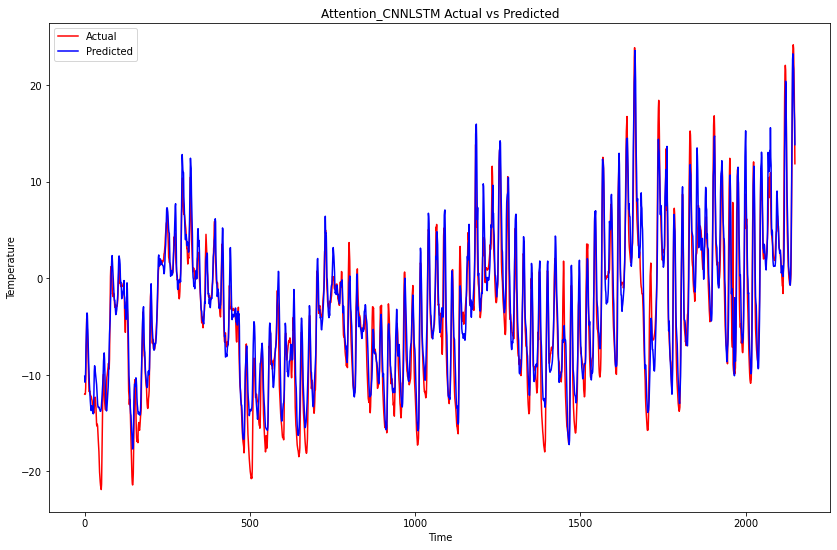

+-------------+----------+------+------+------+------+
| Hours Ahead | R2 Score | MAE  | MSE  | RMSE | AGM  |
+-------------+----------+------+------+------+------+
|      1      |   0.96   | 1.07 | 2.08 | 1.44 | 0.05 |
|      2      |   0.96   | 1.17 | 2.51 | 1.58 | 0.06 |
|      3      |   0.95   | 1.25 | 2.77 | 1.66 | 0.07 |
|      4      |   0.94   | 1.39 | 3.44 | 1.85 | 0.1  |
|      5      |   0.92   | 1.61 | 4.56 | 2.14 | 0.15 |
|      6      |   0.89   | 1.9  | 6.31 | 2.51 | 0.24 |
+-------------+----------+------+------+------+------+


,Attention,MAE,MSE,RMSE,R2,Agg,Time Taken,Hours Ahead
0,False,1.153117,2.427346,1.557994,0.957849,0.057138,3.66,1
1,False,1.322264,3.184333,1.784470,0.945024,0.085398,3.66,2
2,False,1.470980,3.761454,1.939447,0.935378,0.110194,3.66,3
3,False,1.587186,4.371404,2.090790,0.925193,0.137569,3.66,4
4,False,1.805051,5.447945,2.334083,0.907025,0.192418,3.66,5
5,False,2.151742,7.681409,2.771535,0.869098,0.322234,3.66,6
0,True,1.071267,2.075409,1.440628,0.963961,0.045264,3.83,1
1,True,1.172397,2.511121,1.584652,0.956646,0.059764,3.83,2
2,True,1.246636,2.769643,1.664224,0.952418,0.069253,3.83,3
3,True,1.391333,3.435147,1.853415,0.941215,0.095371,3.83,4


Files deleted


In [7]:
build_model('CNN-LSTM',scaler,x_train,x_test,y_train,y_test,32,200)

In [ ]:
build_model('Wavenet',scaler,x_train,x_test,y_train,y_test,32,200)

You selected WaveNet
X_train shape is: (8686, 24, 3) and X_test shape is: (2150, 24, 3)
Y_train shape is: (8686, 6) and Y_test shape is: (2150, 6)
Directory Created!!!
X <xlwt.Worksheet.Worksheet object at 0x000001E70FD0D608>
Epoch 1/200
245/245 [==============================] - 3s 11ms/step - loss: 0.0211 - mae: 0.0955 - val_loss: 0.0028 - val_mae: 0.0410
Epoch 2/200
245/245 [==============================] - 2s 8ms/step - loss: 0.0051 - mae: 0.0533 - val_loss: 0.0020 - val_mae: 0.0347
Epoch 3/200
245/245 [==============================] - 2s 8ms/step - loss: 0.0037 - mae: 0.0455 - val_loss: 0.0017 - val_mae: 0.0319
Epoch 4/200
245/245 [==============================] - 2s 7ms/step - loss: 0.0030 - mae: 0.0400 - val_loss: 0.0011 - val_mae: 0.0262
Epoch 5/200
245/245 [==============================] - 2s 8ms/step - loss: 0.0025 - mae: 0.0365 - val_loss: 0.0011 - val_mae: 0.0258
Epoch 6/200
245/245 [==============================] - 2s 8ms/step - loss: 0.0021 - mae: 0.0334 - val_loss: 

Epoch 57/200
245/245 [==============================] - 2s 7ms/step - loss: 7.9417e-04 - mae: 0.0206 - val_loss: 6.4663e-04 - val_mae: 0.0206
Epoch 58/200
245/245 [==============================] - 2s 7ms/step - loss: 8.0775e-04 - mae: 0.0207 - val_loss: 5.7545e-04 - val_mae: 0.0190
Epoch 59/200
245/245 [==============================] - 2s 7ms/step - loss: 7.7802e-04 - mae: 0.0203 - val_loss: 5.4558e-04 - val_mae: 0.0186
Epoch 60/200
245/245 [==============================] - 2s 7ms/step - loss: 7.1726e-04 - mae: 0.0194 - val_loss: 4.8788e-04 - val_mae: 0.0174
Epoch 61/200
245/245 [==============================] - 2s 7ms/step - loss: 7.8361e-04 - mae: 0.0205 - val_loss: 0.0011 - val_mae: 0.0282
Epoch 62/200
245/245 [==============================] - 2s 7ms/step - loss: 8.4970e-04 - mae: 0.0210 - val_loss: 5.5735e-04 - val_mae: 0.0190
Epoch 63/200
245/245 [==============================] - 2s 7ms/step - loss: 7.4975e-04 - mae: 0.0199 - val_loss: 6.1180e-04 - val_mae: 0.0198
Epoch 64/2

In [8]:
y.shape

(10866, 6, 1)

In [ ]:
# Reading the file
src = r'C:\Users\Saad.LAKES\Desktop\Pavement-Temperature-Prediction\Data'
filename = 'Pave_data_cleaned.xlsx'

df = pd.read_excel(os.path.join(src,filename))
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

In [ ]:
df.shape

In [ ]:
x_train,x_test,y_train,y_test,scaler_single = splitter(df[['Temp','Solar','Pavement']],
                                                            ['Pavement'],24,24,0.8,True)

In [ ]:
print(f'The shape of x_train is {x_train.shape} and x_test is {x_test.shape}')
print(f'The shape of y_train is {y_train.shape} and y_test is {y_test.shape}')

In [ ]:
class attention(keras.layers.Layer):
    '''
    if return_sequences=True, it will give 3D vector and if false it will give 2D vector. It is same as LSTMs.

    https://stackoverflow.com/questions/62948332/how-to-add-attention-layer-to-a-bi-lstm/62949137#62949137
    the  following code is being copied from the above link.
    '''

    def __init__(self, return_sequences=True, **kwargs):
        self.return_sequences = return_sequences
        super(attention, self).__init__()

    def get_config(self):
        cfg = super().get_config()
        return cfg

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1),
                                 initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1),
                                 initializer="zeros")

        super(attention, self).build(input_shape)

    def call(self, x):
        e = K.tanh(K.dot(x, self.W) + self.b)
        a = K.softmax(e, axis=1)
        output = x * a

        if self.return_sequences:
            return output

        return K.sum(output, axis=1)

In [ ]:
K.clear_session()
model = keras.Sequential()
model.add(keras.layers.LSTM(32, return_sequences=True, input_shape=(24,3)))
model.add(keras.layers.LSTM(32, return_sequences=True))
model.add(Dropout(0.3))
model.add(keras.layers.LSTM(32, return_sequences=True))
model.add(keras.layers.LSTM(32, return_sequences=True))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dense(24))

model.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['mae'])

model.summary()


In [ ]:
name = 'simple_lstm'
filepath_simple = '{}.hdf5'.format(name)
checkpoint_simple = keras.callbacks.ModelCheckpoint(filepath_simple,monitor='val_loss',save_best_only=True)
# checkpoint_attention = keras.callbacks.ModelCheckpoint(filepath_attention, monitor='val_loss', verbose=0,save_best_only=True, mode=min)

# earlystop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0004, patience=3)


In [ ]:
history = model.fit(x_train,y_train,epochs=200,batch_size=32,validation_split=0.1,callbacks=[checkpoint_simple])

In [ ]:
plt.plot(history.history['loss'],'r',label='Training Loss')
plt.plot(history.history['val_loss'],'b',label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
preds = model.predict(x_test)
preds1 = scaler_single.inverse_transform(preds)
y_test1 = scaler_single.inverse_transform(y_test[:,:,0])

In [ ]:
model.load_weights(filepath_simple)

In [ ]:
preds.shape

In [ ]:
y_test[:,:,0].shape

In [ ]:
from sklearn.metrics import mean_squared_error as mse
mse(y_test1,preds1)

In [ ]:
y_test1[:,idx].max(),y_test1[:,idx].min()

In [ ]:
idx = 5
plt.plot(preds1[:,idx],'r',label='Predicted')
plt.plot(y_test1[:,idx],'b',label='Actual')
plt.legend()
plt.show()

In [ ]:
mse(y_test1[:,idx],preds1[:,idx])

In [ ]:
def build_lstm(shape,attent):
    K.clear_session()
    model = keras.Sequential()
    model.add(keras.layers.LSTM(32, return_sequences=True, input_shape=(shape[1], shape[2])))
    model.add(keras.layers.LSTM(32, return_sequences=True))
    model.add(keras.layers.LSTM(32, return_sequences=True))
    model.add(keras.layers.LSTM(32, return_sequences=True))
    if attent:
        model.add(attention(return_sequences=True))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(512, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(32))
    model.add(keras.layers.Dense(1))

    model.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['mae'])

    model.summary()

    return model

In [ ]:
foo,doo = create_dataset(df[['Temp','Solar','Pavement']],df['Pavement'],24,24)

In [ ]:
foo.shape

In [ ]:
doo.shape

In [ ]:
foo[1]

In [ ]:
doo[1]

In [ ]:
def create_dataset1(X, y, time_steps, ts_range):
    Xs, ys = [], []
    for i in range(len(X) - time_steps - ts_range):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.values[(i + time_steps):(i + time_steps + ts_range)])
        # ys.append(y.values[(i + time_steps + ts_range-1), 0])
    return np.array(Xs), np.array(ys)

def splitter1(df,output,lag,duration,ts,scale=True):
    assert (0. <= ts <= 1.)
    train_size = int(len(df) * ts)
    test_size = len(df) - train_size
    train, test = df.iloc[0:train_size], df[train_size:]
    print(train.shape, test.shape)
    if scale:
        print('output',output)
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaler_single = MinMaxScaler(feature_range=(0, 1))

        scaler.fit(train)
        scaler_single.fit(train[output])

        train_scaled = pd.DataFrame(scaler.transform(train), columns=[df.columns])

        test_scaled = pd.DataFrame(scaler.transform(test), columns=[df.columns])

        df_train = train_scaled.copy(deep=True)
        df_test = test_scaled.copy(deep=True)

        display(df_train.describe())
        display(df_test.describe())

        x_train,y_train = create_dataset1(df_train,df_train[[output]],lag,duration)
        x_test, y_test = create_dataset1(df_test, df_test[[output]], lag, duration)

#         y_train = y_train.reshape(-1,1)
#         y_test = y_test.reshape(-1,1)
#         return df_train,df_test
        return x_train,x_test,y_train,y_test,scaler_single
    else:
        x_train, y_train = create_dataset(train, train[output], lag, duration)
        x_test, y_test = create_dataset(test, test[output], lag, duration)

        return x_train,x_test,y_train,y_test,None


In [ ]:
# train,test= splitter1(df[['Temp','Solar','Pavement']],['Pavement'],24,24,0.8,True)
x_train,x_test,y_train,y_test,scaler_single= splitter1(df[['Temp','Solar','Pavement']],['Pavement'],24,24,0.8,True)
print(f'The shape of x_train is {x_train.shape} and x_test is {x_test.shape}')
print(f'The shape of y_train is {y_train.shape} and y_test is {y_test.shape}')

In [ ]:
foo,doo = create_dataset1()

# Main

In [ ]:
def main():
    
    ##--------------------------------------- Parameters --------------------------------------------##
    PATH = ['C:/Users/Saad.Lakes/Desktop/Lakes-Software-New/Dataset/KuwaitNN_AMS_Data/AMS 01 - AlMutlah_AMS_Data.xlsx',
           'C:/Users/Saad.Lakes/Desktop/Lakes-Software-New/Dataset/KuwaitNN_AMS_Data/AMS02_Jahra_AMS_Data.xlsx']
    
    INPUTS = ['Date','PM10 Conc','Wind Speed','Wind Direction']
    
    INTERMEDIATE = [['Mutlah PM10 Conc','Mutlah Wind Speed','Mutlah Wind Direction'],
                    ['Jahra PM10 Conc','Jahra Wind Speed','Jahra Wind Direction']]
    
    OUTPUT = ['Mutlah PM10 Conc']
    
    TARGET_PATH = r'C:\Users\Saad.LAKES\Desktop\Lakes-Software-New\Notebooks\Twenty Four Hour Ahead\Mutlah\PM10 Multivariate - Jahra & Mutlah'
    
    DURATION = 24
    
    TRAIN_SIZE = 0.9
    
    SCALE = True
    
    LAG = 24
    
    MODEL=['ConvLSTM','CNN-LSTM','Seq2Seq','LSTM','Wavenet']#] 
    
    BATCH_SIZE=512
    
    EPOCHS=200
    
    
    ## ------------------------------------------ Main ------------------------------------------------- ##
    assert len(INTERMEDIATE) == len(PATH),'Kindly recheck your INTERMEDIATE Variable'
    
    original_path = os.getcwd()
    target_path = TARGET_PATH.replace('\\','/')
    try:
        os.chdir(target_path)
        print('Directory is present there')
    except FileNotFoundError:
        os.chdir(os.path.split(target_path)[0])
        os.mkdir(os.path.split(target_path)[1])
        os.chdir(target_path)
        print('Crerating new directory')
    finally:
        print('The working directory is moved the Target Path !!!')
    
   
    dfs = [Utils.read_data(p,3,6,INPUTS,o,True) for p,o in zip(PATH,INTERMEDIATE)]
    dfs_flatten = [item for sublist in dfs for item in sublist]
    
    final_df = pd.concat(dfs,axis=1,ignore_index=True)
    final_df.columns=dfs_flatten

    display(final_df.head())
       
    x_train,x_test,y_train,y_test,scaler = Utils.splitter(final_df,OUTPUT,LAG,DURATION,TRAIN_SIZE,True)
    
    ###############################################
#     Train.build_model('ConvLSTM',final_df,OUTPUT[0],scaler,x_train,x_test,y_train,y_test,BATCH_SIZE,EPOCHS)
#     time.sleep(2)
#     print('-'*30 + 'The program is restarting'+'-'*30)
#     K.clear_session()
#     tf.compat.v1.reset_default_graph()
#     ###############################################
#     Train.build_model('CNN-LSTM',final_df,OUTPUT[0],scaler,x_train,x_test,y_train,y_test,BATCH_SIZE,EPOCHS)
#     time.sleep(2)
#     print('-'*30 + 'The program is restarting'+'-'*30)
#     K.clear_session()
#     tf.compat.v1.reset_default_graph()
#     ###############################################
#     Train.build_model('Seq2Seq',final_df,OUTPUT[0],scaler,x_train,x_test,y_train,y_test,BATCH_SIZE,EPOCHS)
#     time.sleep(2)
#     print('-'*30 + 'The program is restarting'+'-'*30)
#     K.clear_session()
#     tf.compat.v1.reset_default_graph()
#     ################################################
#     Train.build_model('LSTM',final_df,OUTPUT[0],scaler,x_train,x_test,y_train,y_test,BATCH_SIZE,EPOCHS)
#     time.sleep(2)
#     print('-'*30 + 'The program is restarting'+'-'*30)
#     K.clear_session()
#     tf.compat.v1.reset_default_graph()
#     ###############################################
    Train.build_model('Wavenet',final_df,OUTPUT[0],scaler,x_train,x_test,y_train,y_test,BATCH_SIZE,EPOCHS)
    time.sleep(2)
    print('-'*30 + 'The program is restarting'+'-'*30)
    K.clear_session()
    tf.compat.v1.reset_default_graph()
    
    Ensembler.ensembler(MODEL)
    
    os.chdir(original_path)
    
    print('The working is moved again to the original path!!!')

In [ ]:
if __name__ == '__main__':
    main()

# Experiment

In [ ]:
foo

In [ ]:
x = foo.iloc[:,0:4].values
y = foo.iloc[:,4].values

x,y

In [ ]:
x.shape,y.shape

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,shuffle=True,random_state=42)

y_train= y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler_input = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = scaler_input.fit_transform(x_train)
x_test_scaled = scaler_input.transform(x_test)

scaler_output = MinMaxScaler(feature_range=(0,1))
y_train_scaled = scaler_output.fit_transform(y_train)
y_test_scaled = scaler_output.transform(y_test)

x_train_scaled = x_train_scaled.reshape(x_train_scaled.shape[0],1,x_train_scaled.shape[1])
x_test_scaled = x_test_scaled.reshape(x_test_scaled.shape[0],1,x_test_scaled.shape[1])

print(f'X_train shape is: {x_train_scaled.shape} and X_test shape is: {x_test_scaled.shape}')
print(f'Y_train shape is: {y_train_scaled.shape} and Y_test shape is: {y_test_scaled.shape}')

In [ ]:
x_train1 = x_train.reshape(8124,1,4)
x_test1 = x_test.reshape(903,1,4)

In [ ]:

model = keras.Sequential()
model.add(keras.layers.Dense(32,input_shape=(1,4)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(16))
model.add(keras.layers.Dense(1))

model.compile(loss='mse', optimizer=keras.optimizers.Nadam(), metrics=['mae'])

model.summary()

In [ ]:
history=model.fit(x_train_scaled, y_train_scaled,batch_size=64,epochs=200,validation_split=0.2)

In [ ]:
plt.plot(history.history['loss'],color='r')
plt.plot(history.history['val_loss'],color='b')

In [ ]:
preds=scaler_output.inverse_transform(model.predict(x_test_scaled))

In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
mse(y_test,preds)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(y_test[0:250],color='r')
plt.plot(preds[0:250],color='b')

In [ ]:
from sklearn.model_selection import train_test_split

x= np.array([[1,2,3],[4,5,6],[7,8,9],[0,1,2]])
y= np.array([2,3,4,5])

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=False)

In [ ]:
x_train,x_test,y_train,y_test

In [ ]:
x_train.shape

In [ ]:
def main():
    
    ## Parameters##
    PATH = [r'C:\Users\Saad.LAKES\Desktop\Lakes-Software-New\Dataset\KuwaitNN_AMS_Data\AMS02_Jahra_AMS_Data.xlsx']
    INPUTS = ['Date','Conc,O3,2']
    INTERMEDIATE = [['Mutlah Ozone Conc']]
    OUTPUT = ['Mutlah Ozone Conc']
    TARGET_PATH = r'C:\Users\Saad.LAKES\Desktop\Lakes-Software-New\Notebooks\Trial'
    DURATION = 1
    TRAIN_SIZE = 0.9
    SCALE = True
    LAG = 24
    MODEL=['LSTM','CNN-LSTM','ConvLSTM','Seq2Seq']
    BATCH_SIZE=2048
    EPOCHS=1
    
    ## Main ##
    assert len(INTERMEDIATE) == len(PATH),'Kindly recheck your INTERMEDIATE Variable'
    
    original_path = os.getcwd()
    target_path = TARGET_PATH.replace('\\','/')
    os.chdir(target_path)
    print('The working directory is moved the Target Path !!!')
    
    dfs = [Utils.read_data(p,3,6,INPUTS,o,True) for p,o in zip(PATH,INTERMEDIATE)]
    final_df = pd.concat(dfs,axis=1,ignore_index=True)
    final_df.columns= [dfs[i].columns[0] for i in range(len(dfs))]
    
    display(final_df.head())
    
    x_train,x_test,y_train,y_test,scaler = Utils.splitter(final_df,OUTPUT,LAG,DURATION,TRAIN_SIZE,True)
    
#     for m in MODEL:
#         Train.build_model(m,final_df,OUTPUT[0],scaler,x_train,x_test,y_train,y_test,BATCH_SIZE,EPOCHS)
    x=Ensembler.ensembler(MODEL)

    os.chdir(original_path)

    print('The working is moved again to the original path!!!')
    return x

In [ ]:
if __name__ == '__main__':
    y=main()

In [ ]:
y

In [ ]:
x = y.iloc[:,0:4]
y1 = y.iloc[:,4]

In [ ]:
y1

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y1,test_size=0.1,shuffle=False)

In [ ]:
ytrain.shape

In [ ]:
xtrain

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
x1=sc.fit_transform(xtrain)
x2 = sc.transform(xtest)

In [ ]:
xtrain

In [ ]:
foo = 'C:/Users/Saad.LAKES/Desktop/Lakes-Software-New/Notebooks/Mutlah/tester'
os.path.split(foo)[1]
try:
    os.chdir(foo)
except FileNotFoundError:
    os.chdir(os.path.split(foo)[0])
    os.mkdir(os.path.split(foo)[1])
    os.chdir(foo)
finally:
    print('You are done!!')


In [ ]:
C:/Users/Saad.LAKES/Desktop/Lakes-Software-New\\Python Scripts

In [ ]:
#'C:/Users/Saad.Lakes/Desktop/Lakes-Software-New/Dataset/KuwaitNN_AMS_Data/AMS02_Jahra_AMS_Data.xlsx',

In [ ]:
os.chdir(r'C:\Users\Saad.LAKES\Desktop\Lakes-Software-New\Notebooks')
os.getcwd()

In [ ]:
final_df = pd.concat(dfs ,axis=1,ignore_index=True)
final_df.head()

In [ ]:
dfs[0].columns[0]

In [ ]:
x_train,x_test,y_train,y_test,scaler,df_jahra = Utils.splitter(Utils.read_data(PATH,3,6,INPUTS,OUTPUT,True),OUTPUT,LAG,DURATION,TRAIN_SIZE,True)

In [ ]:
Train.build_model(MODEL,df_jahra,OUTPUT[0],scaler,x_train,x_test,y_train,y_test,BATCH_SIZE,EPOCHS)

In [ ]:
OUTPUT[0]

In [ ]:
df_jahra.describe()

In [ ]:
import os
import pandas as pd
os.getcwd()

In [ ]:
ls

In [ ]:
df1 = pd.read_excel('Simple_LSTM Results.xls',sheet_name='Predictions')

In [ ]:
df1.head()

In [ ]:
df2 = pd.read_excel('Attention_LSTM Results.xls',sheet_name='Predictions')

In [ ]:
df2.head()

In [ ]:
df_combined = pd.concat([df1,df2],axis=1)
df_combined.head()

In [ ]:
df_combined.drop(columns=['Actual'],inplace=True)
df_combined.head()

In [ ]:
def cleaner(direct,name):
    path_old = os.getcwd()
    path_new = os.getcwd() + '\\{0}'.format(direct)

    os.chdir(path_new)

    df_simple = pd.read_excel(name[0]+' Results.xls',sheet_name='Simple')
    df_att = pd.read_excel(name[1]+' Results.xls',sheet_name='Attention')

    df_all = pd.concat([df_simple,df_att],axis=0)
    df_all.columns = ['Steps Ahead','MAE','MSE','RMSE','R2','AGG','NMSE','NRMSE','Time Taken']

    df_all.to_excel('Forecasting Results.xls')

    pred_simple = pd.read_excel(name[0]+' Results.xls',sheet_name='Predictions')
    pred_att = pd.read_excel(name[1]+' Results.xls',sheet_name='Predictions')


    pred_all = pd.concat([pred_simple,pred_att],axis=1)
    pred_all.drop(columns=['Actual'],inplace=True)
    pred_all.drop(pred_all.columns[pred_all.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
    pred_all=pd.concat([pred_all,pred_simple[['Actual']]],axis=1)

    pred_all.to_excel('Forecasting Values.xls')

    os.chdir(path_old)

    return

In [ ]:
directory = 'LSTM'
name =['Simple_LSTM','Attention_LSTM']

In [ ]:
cleaner(directory,name)

In [ ]:
os.chdir('C:/Users/saad/Desktop/Lakes-Software-New/Python Scripts')

In [ ]:
os.getcwd()

In [ ]:
from IPython.display import display